In [2]:
lung_onda = 650e-09
L = 0.99

class Solution:
   def solve(self, intervals):
      start, end = intervals.pop()
      while intervals:
         start_temp, end_temp = intervals.pop()
         start = max(start, start_temp)
         end = min(end, end_temp)
      return [start, end]
ob = Solution()


def findMin(findNmin,xdata,Idata,bfit):
  period = lung_onda*L/bfit
  minimum = np.ones(findNmin*2)*10
  minimumIndex = np.zeros(findNmin*2)

  for t in range(findNmin):
    for i in range(len(xdata)):
      if(xdata[i]<9/8*period*(t+1) and xdata[i]>7/8*period*(t+1)):
        if(Idata[i]<minimum[t]):
          minimum[t]=Idata[i]
          minimumIndex[t] = i
      if(-xdata[i]<9/8*period*(t+1) and -xdata[i]>7/8*period*(t+1)):
        if(Idata[i]<minimum[t+findNmin]):
          minimum[t+findNmin]=Idata[i]
          minimumIndex[t+findNmin] = i

  minimumIndexReturn = []
  for i in range(len(minimumIndex)):
    minimumIndexReturn.append(int(minimumIndex[i]))
  return minimumIndexReturn

def findMinWithRange(findNmin,xdata,Idata,bfit,error):
  period = lung_onda*L/bfit
  minimum = np.ones(findNmin*2)*10
  minimumdxx = np.zeros(findNmin*2)
  minimumsxx = np.zeros(findNmin*2)
  minimumIndex = np.zeros(findNmin*2)
  

  for t in range(findNmin):
    for i in range(len(xdata)):
      if(xdata[i]<9/8*period*(t+1) and xdata[i]>7/8*period*(t+1)):
        if(Idata[i]<minimum[t]):
          minimum[t]=Idata[i]
          minimumdxx[t] = minimumsxx[t] = xdata[i]
          minimumIndex[t] = i
      if(-xdata[i]<9/8*period*(t+1) and -xdata[i]>7/8*period*(t+1)):
        if(Idata[i]<minimum[t+findNmin]):
          minimum[t+findNmin]=Idata[i]
          minimumdxx[t+findNmin] = minimumsxx[t+findNmin] = xdata[i]
          minimumIndex[t+findNmin] = i

  minimumsx = []
  minimumdx = []
  
  for i in range(len(minimumIndex)):
    minimumsx.append(int(minimumIndex[i]))
    minimumdx.append(int(minimumIndex[i]))
  
  for t in range(findNmin):
    for i in range(len(xdata)):
      if(xdata[i]<9/8*period*(t+1) and xdata[i]>7/8*period*(t+1)):
        if(Idata[i]<minimum[t]*error[t]):
          if(np.abs(minimumdxx[t]) < np.abs(xdata[i])):
            minimumdxx[t] = xdata[i]
            minimumdx[t] = i
          if(np.abs(minimumsxx[t]) > np.abs(xdata[i])):
            minimumsxx[t] = xdata[i]
            minimumsx[t] = i
  
  for t in range(findNmin):
    for i in range(len(xdata)):
      if(-xdata[i]<9/8*period*(t+1) and -xdata[i]>7/8*period*(t+1)):
        if(Idata[i]<minimum[t+findNmin]*error[t+findNmin]):
          if(np.abs(minimumsxx[t+findNmin]) < np.abs(xdata[i])):
            minimumsxx[t+findNmin] = xdata[i]
            minimumsx[t+findNmin] = i
          if(np.abs(minimumdxx[t+findNmin]) > np.abs(xdata[i])):
            minimumdx[t+findNmin] = i
            minimumdxx[t+findNmin] = xdata[i]

  
  
  minimumIndexReturn = []
  for i in range(len(minimumsx)):
    minimumIndexReturn.append(int(minimumsx[i]))
  for i in range(len(minimumsx)):
    minimumIndexReturn.append(int(minimumdx[i]))
  return minimumIndexReturn

def findMax(findNmax,xdata,Idata,bfit):
  period = lung_onda*L/bfit
  maximum = np.ones(findNmax*2)*-10
  maximumIndex = np.zeros(findNmax*2)

  for t in range(findNmax):
    for i in range(len(xdata)):
      if(xdata[i]<2*period*(t+1) and xdata[i]>period*(t+1)):
        if(Idata[i]>maximum[t]):
          maximum[t]=Idata[i]
          maximumIndex[t] = i
      if(-xdata[i]<2*period*(t+1) and -xdata[i]>period*(t+1)):
        if(Idata[i]>maximum[t+findNmax]):
          maximum[t+findNmax]=Idata[i]
          maximumIndex[t+findNmax] = i

  maximumIndexReturn = []
  for i in range(len(maximumIndex)):
    maximumIndexReturn.append(int(maximumIndex[i]))
  return maximumIndexReturn

In [1]:
from os import path
import re

import numpy as np
import pandas as pd

here = path.dirname('/content/')

df = pd.read_csv(
    path.join(here, './Capstone_Data.tsv'),
    sep='\t',
    engine='python',
    decimal=r',',
)


i=0
nan_value = float("NaN")
for col in df:
  if(i==0):
    
    col0=col
    title = col.replace('Relative Intensity ','')
    #df[col].to_csv(path.join(here + '/file.tsv'), sep='\t', index=False)
  elif(i==1):
    col1=col
    
  else:
    dfsliced = df[[col0,col1]]
    dfsliced.replace("", nan_value, inplace=True)
    dfsliced.dropna(inplace=True)
    dfsliced.to_csv(path.join(here + '/' + title + '.txt'), sep='\t', index=False)
    
    i = 0
    col0 = col
    title = col.replace('Relative Intensity ','')
  i = i+1  
  
dfsliced = df[[col0,col1]]
dfsliced.replace("", nan_value, inplace=True)
dfsliced.dropna(inplace=True)
dfsliced.to_csv(path.join(here + '/' + title + '.txt'), sep='\t', index=False)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


maxIntens
36.9092888
maxIntens2
37.4480614
maxIntens3
40.937609099999996
maxIntens4
20.5756707
b
0.00016
bfit
[0.00016558]
[1.06583062e-06]
5e-06
Intensityfit
36.9092888
0.3
bfit2
[0.00016345]
[8.17298e-07]
4.000000000000001e-06
Intensityfit2
37.4480614
0.3
bfit3
[0.00015947]
[5.04625591e-07]
7e-06
Intensityfit3
40.937609099999996
0.6
bfit4
[0.00016288]
[3.56007477e-07]
1e-05
Intensityfit4
20.5756707
0.3
bestbtot1234
8e-05
1.0000000000000002e-06
bestbtot123
7.900000000000001e-05
3e-06
bestIntensity123
16.5
0.1
b set 1
[0.00015530576440815497, 0.00016010974347284098, 0.00015910080723571162, 0.0001633323111421131]
[8.215554094678453e-06, 3.7733234541048556e-06, 1.0972591789377079e-05, 1.1770462038467128e-05]
0.0001597467666837619
b set 2
[0.00015607062716114527, 0.00015874027467593254, 0.0001567691760860128, 0.00016229860321244374]
[4.527379338761271e-06, 6.243057908209311e-06, 4.5679731657713625e-06, 7.748902891674138e-06]
0.00015902106567723077
b set 3
[0.00015684364007692036, 0.000160

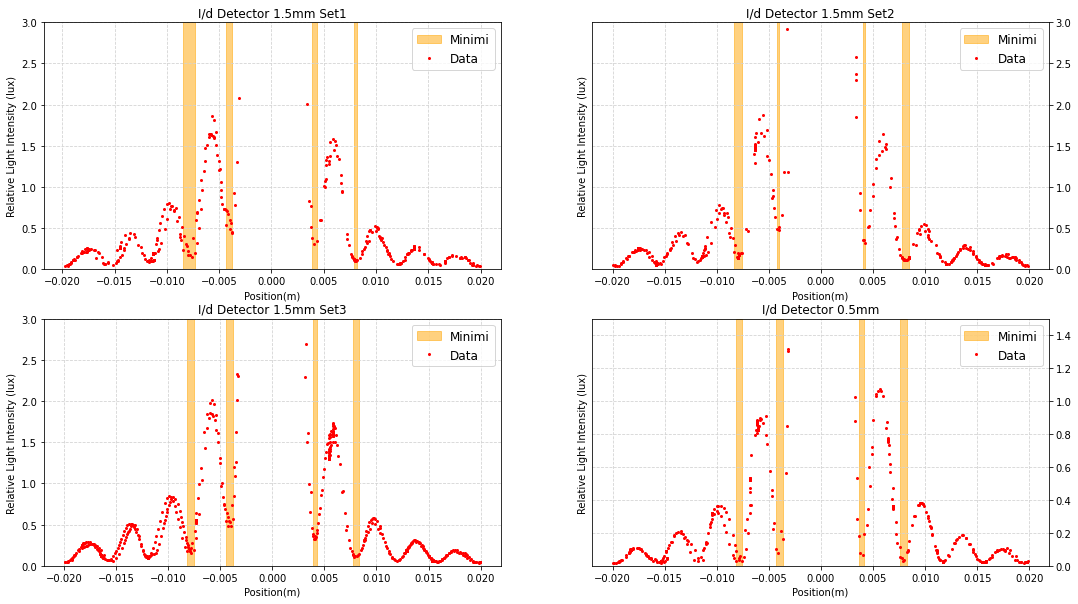

In [4]:
b = 0.16e-03

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


Table = np.loadtxt("./Antonio_0.16_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table = Table.transpose()

Table2 = np.loadtxt("./Alessio_0.16_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table2 = Table2.transpose()

Table3 = np.loadtxt("./Alessandra_0.16_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table3 = Table3.transpose()

Table4 = np.loadtxt("./Alessio_0.16_0.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table4 = Table4.transpose()

Idata = Table[0]-0.013578
xdata = Table[1]*1.01

Idata2 = Table2[0]-0.013578
xdata2 = Table2[1]*1.01

Idata3 = Table3[0]-0.013578
xdata3 = Table3[1]*1.01

Idata4 = Table4[0]-0.013578
xdata4 = Table4[1]*1.01



maxint = np.argmax(Idata)
maxint2 = np.argmax(Idata2)
maxint3 = np.argmax(Idata3)
maxint4 = np.argmax(Idata4)

translate = np.array([-xdata[maxint]-0.0001,-xdata2[maxint2]-0.0002,-xdata3[maxint3]-0.0003,-xdata4[maxint4]+0.0001])

xdata = (xdata)+translate[0]


xdata2 = (xdata2)+translate[1]


xdata3 = (xdata3)+translate[2]


xdata4 = (xdata4)+translate[3]

#taglio a dx e sx 

xdata1 = []
Idata1 = []
for i in range(len(xdata)):
  if(np.abs(xdata[i])<0.02):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])

Idata = Idata1
xdata = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata2)):
  if(np.abs(xdata2[i])<0.02):
    xdata1.append(xdata2[i])
    Idata1.append(Idata2[i])

Idata2 = Idata1
xdata2 = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata3)):
  if(np.abs(xdata3[i])<0.02):
    xdata1.append(xdata3[i])
    Idata1.append(Idata3[i])

Idata3 = Idata1
xdata3 = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata4)):
  if(np.abs(xdata4[i])<0.02):
    xdata1.append(xdata4[i])
    Idata1.append(Idata4[i])

Idata4 = Idata1
xdata4 = xdata1

MaxIntensity = np.max(Idata)
print('maxIntens')
print(MaxIntensity)

MaxIntensity2 = np.max(Idata2)
print('maxIntens2')
print(MaxIntensity2)

MaxIntensity3 = np.max(Idata3)
print('maxIntens3')
print(MaxIntensity3)

MaxIntensity4 = np.max(Idata4)
print('maxIntens4')
print(MaxIntensity4)

xdataerr = np.ones(len(xdata))*8e-6
Idataerr = np.ones(len(xdata))*(4.59/100*3)

xdataerr2 = np.ones(len(xdata2))*8e-6
Idataerr2 = np.ones(len(xdata2))*(4.59/100*3)

xdataerr3 = np.ones(len(xdata3))*8e-6
Idataerr3 = np.ones(len(xdata3))*(4.59/100*3)

xdataerr4 = np.ones(len(xdata4))*8e-6
Idataerr4 = np.ones(len(xdata4))*(4.59/100*3)


def distanceFunctionFit(x,b):
  return (MaxIntensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit2(x,b):
  return (MaxIntensity2*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit3(x,b):
  return (MaxIntensity3*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit4(x,b):
  return (MaxIntensity4*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit5(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

#simulation

#tolgo gli zeri

xdata1 = []
Idata1 = []
Idataerr1 = []
xdataerr1 = []
for i in range(len(Idata)):
  if(xdata[i] != 0):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])
    Idataerr1.append(Idataerr[i])
    xdataerr1.append(xdataerr[i])

xdata12 = []
Idata12 = []
Idataerr12 = []
xdataerr12 = []
for i in range(len(Idata2)):
  if(xdata2[i] != 0):
    xdata12.append(xdata2[i])
    Idata12.append(Idata2[i])
    Idataerr12.append(Idataerr2[i])
    xdataerr12.append(xdataerr2[i])

xdata13 = []
Idata13 = []
Idataerr13 = []
xdataerr13 = []
for i in range(len(xdata3)):
  if(xdata3[i] != 0):
    xdata13.append(xdata3[i])
    Idata13.append(Idata3[i])
    Idataerr13.append(Idataerr3[i])
    xdataerr13.append(xdataerr3[i])

xdata14 = []
Idata14 = []
Idataerr14 = []
xdataerr14 = []
for i in range(len(xdata4)):
  if(xdata4[i] != 0):
    xdata14.append(xdata4[i])
    Idata14.append(Idata4[i])
    Idataerr14.append(Idataerr4[i])
    xdataerr14.append(xdataerr4[i])


#fitting distance from measured intensity
print("b")
print(b)
#set1
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata1, Idata1,sigma = Idataerr1,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit = popt
print("bfit")
print(bfit)
print(bfiterr)
print(0.5*10**(-5))
print('Intensityfit')
print(MaxIntensity)
print(0.3)
xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfitb,bfit)
x = np.linspace(min(xdata),max(xdata),1000)
y = distanceFunctionFit(x,bfit)
#set2
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit2, xdata12, Idata12,sigma = Idataerr12,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit2 = popt
print("bfit2")

print(bfit2)
print(bfiterr)
print(0.4*10**(-5))
print('Intensityfit2')
print(MaxIntensity2)
print(0.3)
xfitb2 = np.linspace(min(xdata), max(xdata), 1000)
yfitb2 = distanceFunctionFit2(xfitb2,bfit2)
x2 = np.linspace(min(xdata2),max(xdata2),1000)
y2 = distanceFunctionFit2(x2,bfit2)


guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit3, xdata13, Idata13,sigma = Idataerr13,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit3 = popt
print("bfit3")

print(bfit3)
print(bfiterr)
print(0.7*10**(-5))
print('Intensityfit3')
print(MaxIntensity3)
print(0.6)
xfitb3 = np.linspace(min(xdata3), max(xdata3), 1000)
yfitb3 = distanceFunctionFit3(xfitb3,bfit3)
x3 = np.linspace(min(xdata3),max(xdata3),1000)
y3 = distanceFunctionFit3(x3,bfit3)


#set3
#set4
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit4, xdata14, Idata14,sigma = Idataerr14,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit4 = popt
print("bfit4")

print(bfit4)
print(bfiterr)
print(1*10**(-5))
print('Intensityfit4')
print(MaxIntensity4)
print(0.3)
xfitb4 = np.linspace(min(xdata4), max(xdata4), 1000)
yfitb4 = distanceFunctionFit4(xfitb4,bfit4)
x4 = np.linspace(min(xdata4),max(xdata4),1000)
y4 = distanceFunctionFit4(x4,bfit4)

print('bestbtot1234')
print(8*10**(-5))
print(0.1*10**(-5))
print('bestbtot123')
print(7.9*10**(-5))
print(0.3*10**(-5))
print('bestIntensity123')
print(16.5)
print(0.1)

xtot = np.linspace(min(xdata4),max(xdata4),1000)
ytot = distanceFunctionFit5(x4,16.2*10**(-5),37.15)


#graph

numminimi = 2
#minimumdata = findMin(3,xdata1,Idata1,bfit)
minimumdata = findMinWithRange(numminimi,xdata1,Idata1,0.00016,np.array([1.3,1.3,1.3,1.6]))

#minimumdata2 = findMin(3,xdata12,Idata12,bfit2)
minimumdata2 = findMinWithRange(numminimi,xdata12,Idata12,0.00016,np.array([1.3,1.3,1.3,1.6]))
#minimumdata3 = findMin(3,xdata13,Idata13,bfit3)
minimumdata3 = findMinWithRange(numminimi,xdata13,Idata13,0.00016,np.array([1.3,1.3,1.3,1.3]))
#minimumdata4 = findMin(3,xdata14,Idata14,bfit4)
minimumdata4 = findMinWithRange(numminimi,xdata14,Idata14,0.00016,np.array([3,3,3,1.3]))
#maximumdata = findMax(2,xdata1,Idata1,bfit)
#maximumdata2 = findMax(2,xdata12,Idata12,bfit2)
#maximumdata3 = findMax(2,xdata13,Idata13,bfit3)
#maximumdata4 = findMax(2,xdata14,Idata14,bfit4)

fig, axs = plt.subplots(2, 2,figsize=(18,10))
axs[0, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 0].set_ylim([0, 3])
#axs[0, 0].plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 0].plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 0].errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[0, 0].set_title('I/d Detector 1.5mm Set1')
axs[0, 0].axvspan(xdata1[minimumdata[0]],xdata1[minimumdata[0+numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[0, 0].axvspan(xdata1[minimumdata[1]],xdata1[minimumdata[1+numminimi*2]], alpha=0.5, color='orange')
axs[0, 0].axvspan(xdata1[minimumdata[2]],xdata1[minimumdata[2+numminimi*2]], alpha=0.5, color='orange')
axs[0, 0].axvspan(xdata1[minimumdata[3]],xdata1[minimumdata[3+numminimi*2]], alpha=0.5, color='orange')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[4]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[5]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[2]],yint, color='red', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[3]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].legend(loc="upper right",prop={'size': 12})
bintervals = []
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata1[minimumdata[i]])+np.abs(xdata1[minimumdata[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata1[minimumdata[i]]-xdata1[minimumdata[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 1')
print(b)
print(berr)
print(np.average(b,weights = berr))

b1 = np.average(b,weights = berr)
b1err = np.mean(berr)

axs[0, 1].grid(color='lightgray',linestyle="--",zorder=0)
#axs[0, 1].plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 1].plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 1].errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[0, 1].set_title('I/d Detector 1.5mm Set2')
axs[0, 1].legend(loc="upper right",prop={'size': 7.5})
axs[0, 1].set_ylim([0, 3])
axs[0, 1].axvspan(xdata12[minimumdata2[0]],xdata12[minimumdata2[0+numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[0, 1].axvspan(xdata12[minimumdata2[1]],xdata12[minimumdata2[1+numminimi*2]], alpha=0.5, color='orange')
axs[0, 1].axvspan(xdata12[minimumdata2[2]],xdata12[minimumdata2[2+numminimi*2]], alpha=0.5, color='orange')
axs[0, 1].axvspan(xdata12[minimumdata2[3]],xdata12[minimumdata2[3+numminimi*2]], alpha=0.5, color='orange')
axs[0, 1].legend(loc="upper right",prop={'size': 12})
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata12[minimumdata2[i]])+np.abs(xdata12[minimumdata2[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata12[minimumdata2[i]]-xdata12[minimumdata2[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 2')
print(b)
print(berr)
print(np.average(b,weights = berr))
b2 = np.average(b,weights = berr)
b2err = np.mean(berr)

axs[1, 0].grid(color='lightgray',linestyle="--",zorder=0)
#axs[1, 0].plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 0].plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 0].errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[1, 0].set_title('I/d Detector 1.5mm Set3')
axs[1, 0].legend(loc="upper right",prop={'size': 7.5})
axs[1, 0].set_ylim([0, 3])
axs[1, 0].axvspan(xdata13[minimumdata3[0]],xdata13[minimumdata3[0+numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[1, 0].axvspan(xdata13[minimumdata3[1]],xdata13[minimumdata3[1+numminimi*2]], alpha=0.5, color='orange')
axs[1, 0].axvspan(xdata13[minimumdata3[2]],xdata13[minimumdata3[2+numminimi*2]], alpha=0.5, color='orange')
axs[1, 0].axvspan(xdata13[minimumdata3[3]],xdata13[minimumdata3[3+numminimi*2]], alpha=0.5, color='orange')
axs[1, 0].legend(loc="upper right",prop={'size': 12})
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata13[minimumdata3[i]])+np.abs(xdata13[minimumdata3[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata13[minimumdata3[i]]-xdata13[minimumdata3[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 3')
print(b)
print(berr)
print(np.average(b,weights = berr))
b3 = np.average(b,weights = berr)
b3err = np.mean(berr)

axs[1, 1].grid(color='lightgray',linestyle="--",zorder=0)
#axs[1, 1].plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 1].plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 1].errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[1, 1].set_title('I/d Detector 0.5mm')
axs[1, 1].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].yaxis.tick_right()
axs[1, 1].set_ylim([0, 1.5])
axs[1, 1].axvspan(xdata14[minimumdata4[0]],xdata14[minimumdata4[numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[1, 1].axvspan(xdata14[minimumdata4[1]],xdata14[minimumdata4[1+numminimi*2]], alpha=0.5, color='orange')
axs[1, 1].axvspan(xdata14[minimumdata4[2]],xdata14[minimumdata4[2+numminimi*2]], alpha=0.5, color='orange')
axs[1, 1].axvspan(xdata14[minimumdata4[3]],xdata14[minimumdata4[3+numminimi*2]], alpha=0.5, color='orange')
axs[1, 1].legend(loc="upper right",prop={'size': 12})
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata14[minimumdata4[i]])+np.abs(xdata14[minimumdata4[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata14[minimumdata4[i]]-xdata14[minimumdata4[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 4')
print(b)
print(berr)
print(np.average(b,weights = berr))
b4 = np.average(b,weights = berr)
b4err = np.mean(berr)

intervals = ob.solve(bintervals)
print('b finale per 0.16')
print((intervals[0]+intervals[1])/2)
print(np.abs(intervals[0]-intervals[1])/2)

#print('b finale per 0.08')
#print(np.mean(np.array([b1,b2,b3,b4])))
#print(np.std(np.array([b1,b2,b3,b4])))





for ax in axs.flat:
    ax.set(xlabel='Position(m)', ylabel='Relative Light Intensity (lux)')

axs[0, 1].yaxis.tick_right()
axs[0, 1].set(ylabel='Relative Light Intensity (lux)')
plt.show()
fig.savefig(f'4Grafici_0.16.pdf',dpi = 300)


xdata0161 = xdata1
Idata0161 = Idata1

xdata0162 = xdata12
Idata0162 = Idata12

xdata0163 = xdata13
Idata0163 = Idata13

xdata0164 = xdata14
Idata0164 = Idata14

maxIntens
16.54674
maxIntens2
17.1200127
maxIntens3
16.944277200000002
maxIntens4
4.8884911
b
8e-05
bfit
[7.81423556e-05]
[1.5292663e-07]
5e-06
Intensityfit
16.6
0.6
bfit2
[8.00561647e-05]
[9.64655618e-08]
4.000000000000001e-06
Intensity2
17
0.6
bfit3
7.858930162525075e-05
7.636566210388845e-08
4.000000000000001e-06
Intensityfit3
16.647122932286916
0.014621853275762426
0.6
bfit4
[8.51125761e-05]
[1.63284296e-07]
5e-06
Intensity4
4.9
0.3
bestbtot1234
8e-05
1.0000000000000002e-06
bestbtot123
7.900000000000001e-05
3e-06
bestIntensity123
16.5
0.1
b set 1
[7.955805039381236e-05, 8.125931763248837e-05, 7.936257606852039e-05, 8.187723310491206e-05]
[3.5281195414620118e-06, 1.637466651468042e-06, 2.146431983816664e-06, 3.010565566791795e-06]
8.046366161190807e-05
b set 2
[8.015034435938424e-05, 8.095383137893726e-05, 7.859014242927548e-05, 8.07009702579835e-05]
[4.05924202289682e-07, 1.3213298465301728e-06, 4.207517962124125e-06, 1.4640750833376625e-06]
7.951554970191811e-05
b set 3
[7.9268920

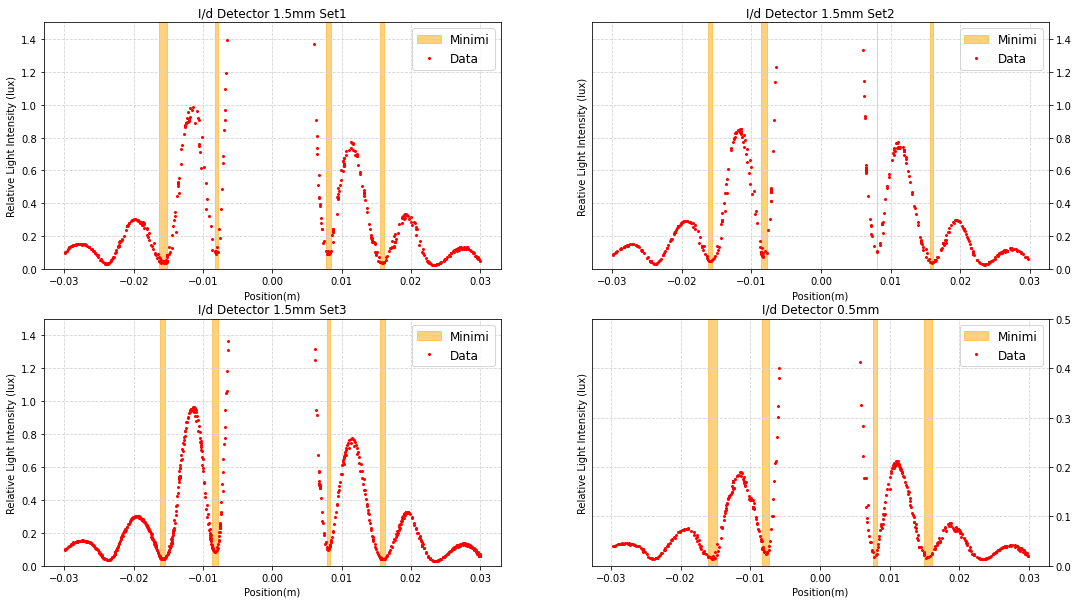

In [5]:
b = 0.08e-03

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


Table = np.loadtxt("./Antonio_0.08_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table = Table.transpose()

Table2 = np.loadtxt("./Alessio_0.08_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table2 = Table2.transpose()

Table3 = np.loadtxt("./Alessandra_0.08_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table3 = Table3.transpose()

Table4 = np.loadtxt("./Antonio_0.08_0.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table4 = Table4.transpose()

Idata = Table[0]-0.013578
xdata = Table[1]*1.01

Idata2 = Table2[0]-0.013578
xdata2 = Table2[1]*1.01

Idata3 = Table3[0]-0.013578
xdata3 = Table3[1]*1.01

Idata4 = Table4[0]-0.013578
xdata4 = Table4[1]*1.01

maxint = np.argmax(Idata)
xdata = (xdata-xdata[maxint])

maxint = np.argmax(Idata2)
xdata2 = (xdata2-xdata2[maxint])

maxint = np.argmax(Idata3)
xdata3 = (xdata3-xdata3[maxint]-0.0001)

maxint = np.argmax(Idata4)
xdata4 = (xdata4-xdata4[maxint]-0.0005)

#taglio a dx e sx 

xdata1 = []
Idata1 = []
for i in range(len(xdata)):
  if(np.abs(xdata[i])<0.03):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])

Idata = Idata1
xdata = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata2)):
  if(np.abs(xdata2[i])<0.03):
    xdata1.append(xdata2[i])
    Idata1.append(Idata2[i])

Idata2 = Idata1
xdata2 = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata3)):
  if(np.abs(xdata3[i])<0.03):
    xdata1.append(xdata3[i])
    Idata1.append(Idata3[i])

Idata3 = Idata1
xdata3 = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata4)):
  if(np.abs(xdata4[i])<0.03):
    xdata1.append(xdata4[i])
    Idata1.append(Idata4[i])

Idata4 = Idata1
xdata4 = xdata1

MaxIntensity = np.max(Idata)
print('maxIntens')
print(MaxIntensity)

MaxIntensity2 = np.max(Idata2)
print('maxIntens2')
print(MaxIntensity2)

MaxIntensity3 = np.max(Idata3)
print('maxIntens3')
print(MaxIntensity3)

MaxIntensity4 = np.max(Idata4)
print('maxIntens4')
print(MaxIntensity4)

xdataerr = np.ones(len(xdata))*8e-6
Idataerr = np.ones(len(xdata))*(4.59/100*3)

xdataerr2 = np.ones(len(xdata2))*8e-6
Idataerr2 = np.ones(len(xdata2))*(4.59/100*3)

xdataerr3 = np.ones(len(xdata3))*8e-6
Idataerr3 = np.ones(len(xdata3))*(4.59/100*3)

xdataerr4 = np.ones(len(xdata4))*8e-6
Idataerr4 = np.ones(len(xdata4))*(4.59/100*3)


def distanceFunctionFit(x,b):
  return (16.6*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit2(x,b):
  return (17*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit3(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit4(x,b):
  return (4.9*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

#simulation

#tolgo gli zeri

xdata1 = []
Idata1 = []
Idataerr1 = []
xdataerr1 = []
for i in range(len(Idata)):
  if(xdata[i] != 0):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])
    Idataerr1.append(Idataerr[i])
    xdataerr1.append(xdataerr[i])

xdata12 = []
Idata12 = []
Idataerr12 = []
xdataerr12 = []
for i in range(len(Idata2)):
  if(xdata2[i] != 0):
    xdata12.append(xdata2[i])
    Idata12.append(Idata2[i])
    Idataerr12.append(Idataerr2[i])
    xdataerr12.append(xdataerr2[i])

xdata13 = []
Idata13 = []
Idataerr13 = []
xdataerr13 = []
for i in range(len(xdata3)):
  if(xdata3[i] != 0):
    xdata13.append(xdata3[i])
    Idata13.append(Idata3[i])
    Idataerr13.append(Idataerr3[i])
    xdataerr13.append(xdataerr3[i])

xdata14 = []
Idata14 = []
Idataerr14 = []
xdataerr14 = []
for i in range(len(xdata4)):
  if(xdata4[i] != 0):
    xdata14.append(xdata4[i])
    Idata14.append(Idata4[i])
    Idataerr14.append(Idataerr4[i])
    xdataerr14.append(xdataerr4[i])


#fitting distance from measured intensity
print("b")
print(b)
#set1
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata1, Idata1,sigma = Idataerr1,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit = popt
print("bfit")
print(bfit)
print(bfiterr)
print(0.5*10**(-5))
print('Intensityfit')
print(16.6)
print(0.6)
xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfitb,bfit)
x = np.linspace(min(xdata),max(xdata),1000)
y = distanceFunctionFit(x,bfit)
#set2
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit2, xdata12, Idata12,sigma = Idataerr12,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit2 = popt
print("bfit2")

print(bfit2)
print(bfiterr)
print(0.4*10**(-5))
print('Intensity2')
print(17)
print(0.6)
xfitb2 = np.linspace(min(xdata), max(xdata), 1000)
yfitb2 = distanceFunctionFit2(xfitb2,bfit2)
x2 = np.linspace(min(xdata2),max(xdata2),1000)
y2 = distanceFunctionFit2(x2,bfit2)


guess = np.array([b,MaxIntensity3])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit3, xdata13, Idata13,sigma = Idataerr13,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit3,intensity = popt
print("bfit3")

print(bfit3)
print(bfiterr)
print(0.4*10**(-5))
print('Intensityfit3')
print(intensity)
print(intensityerr)
print(0.6)
xfitb3 = np.linspace(min(xdata3), max(xdata3), 1000)
yfitb3 = distanceFunctionFit3(xfitb3,bfit3,intensity)
x3 = np.linspace(min(xdata3),max(xdata3),1000)
y3 = distanceFunctionFit3(x3,bfit3,intensity)


#set3
#set4
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit4, xdata14, Idata14,sigma = Idataerr14,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit4 = popt
print("bfit4")

print(bfit4)
print(bfiterr)
print(0.5*10**(-5))
print('Intensity4')
print(4.9)
print(0.3)
xfitb4 = np.linspace(min(xdata4), max(xdata4), 1000)
yfitb4 = distanceFunctionFit4(xfitb4,bfit4)
x4 = np.linspace(min(xdata4),max(xdata4),1000)
y4 = distanceFunctionFit4(x4,bfit4)

print('bestbtot1234')
print(8*10**(-5))
print(0.1*10**(-5))
print('bestbtot123')
print(7.9*10**(-5))
print(0.3*10**(-5))
print('bestIntensity123')
print(16.5)
print(0.1)

xtot = np.linspace(min(xdata4),max(xdata4),1000)
ytot = distanceFunctionFit4(x4,7.9*10**(-5))


#graph
numminimi = 2
#minimumdata = findMin(3,xdata1,Idata1,bfit)
minimumdata = findMinWithRange(numminimi,xdata1,Idata1,0.00008,np.array([1.3,1.3,1.3,1.3]))

#minimumdata2 = findMin(3,xdata12,Idata12,bfit2)
minimumdata2 = findMinWithRange(numminimi,xdata12,Idata12,0.00008,np.array([1.3,1.3,1.3,1.3]))
#minimumdata3 = findMin(3,xdata13,Idata13,bfit3)
minimumdata3 = findMinWithRange(numminimi,xdata13,Idata13,bfit3,np.array([1.3,1.3,1.4,1.3]))
#minimumdata4 = findMin(3,xdata14,Idata14,bfit4)
minimumdata4 = findMinWithRange(numminimi,xdata14,Idata14,bfit4,np.array([1.5,1.5,1.5,1.7]))
#maximumdata = findMax(2,xdata1,Idata1,bfit)
#maximumdata2 = findMax(2,xdata12,Idata12,bfit2)
#maximumdata3 = findMax(2,xdata13,Idata13,bfit3)
#maximumdata4 = findMax(2,xdata14,Idata14,bfit4)

fig, axs = plt.subplots(2, 2,figsize=(18,10))
axs[0, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 0].set_ylim([0, 1.5])
#axs[0, 0].plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 0].plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 0].errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[0, 0].set_title('I/d Detector 1.5mm Set1')
axs[0, 0].axvspan(xdata1[minimumdata[0]],xdata1[minimumdata[0+numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[0, 0].axvspan(xdata1[minimumdata[1]],xdata1[minimumdata[1+numminimi*2]], alpha=0.5, color='orange')
axs[0, 0].axvspan(xdata1[minimumdata[2]],xdata1[minimumdata[2+numminimi*2]], alpha=0.5, color='orange')
axs[0, 0].axvspan(xdata1[minimumdata[3]],xdata1[minimumdata[3+numminimi*2]], alpha=0.5, color='orange')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[4]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[5]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[2]],yint, color='red', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[3]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].legend(loc="upper right",prop={'size': 12})
bintervals = []
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata1[minimumdata[i]])+np.abs(xdata1[minimumdata[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata1[minimumdata[i]]-xdata1[minimumdata[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 1')
print(b)
print(berr)
print(np.average(b,weights = berr))

b1 = np.average(b,weights = berr)
b1err = np.mean(berr)

axs[0, 1].grid(color='lightgray',linestyle="--",zorder=0)
#axs[0, 1].plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 1].plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 1].errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[0, 1].set_title('I/d Detector 1.5mm Set2')
axs[0, 1].legend(loc="upper right",prop={'size': 7.5})
axs[0, 1].set_ylim([0, 1.5])
axs[0, 1].axvspan(xdata12[minimumdata2[0]],xdata12[minimumdata2[0+numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[0, 1].axvspan(xdata12[minimumdata2[1]],xdata12[minimumdata2[1+numminimi*2]], alpha=0.5, color='orange')
axs[0, 1].axvspan(xdata12[minimumdata2[2]],xdata12[minimumdata2[2+numminimi*2]], alpha=0.5, color='orange')
axs[0, 1].axvspan(xdata12[minimumdata2[3]],xdata12[minimumdata2[3+numminimi*2]], alpha=0.5, color='orange')
axs[0, 1].legend(loc="upper right",prop={'size': 12})
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata12[minimumdata2[i]])+np.abs(xdata12[minimumdata2[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata12[minimumdata2[i]]-xdata12[minimumdata2[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 2')
print(b)
print(berr)
print(np.average(b,weights = berr))
b2 = np.average(b,weights = berr)
b2err = np.mean(berr)

axs[1, 0].grid(color='lightgray',linestyle="--",zorder=0)
#axs[1, 0].plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 0].plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 0].errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[1, 0].set_title('I/d Detector 1.5mm Set3')
axs[1, 0].legend(loc="upper right",prop={'size': 7.5})
axs[1, 0].set_ylim([0, 1.5])
axs[1, 0].axvspan(xdata13[minimumdata3[0]],xdata13[minimumdata3[0+numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[1, 0].axvspan(xdata13[minimumdata3[1]],xdata13[minimumdata3[1+numminimi*2]], alpha=0.5, color='orange')
axs[1, 0].axvspan(xdata13[minimumdata3[2]],xdata13[minimumdata3[2+numminimi*2]], alpha=0.5, color='orange')
axs[1, 0].axvspan(xdata13[minimumdata3[3]],xdata13[minimumdata3[3+numminimi*2]], alpha=0.5, color='orange')
axs[1, 0].legend(loc="upper right",prop={'size': 12})
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata13[minimumdata3[i]])+np.abs(xdata13[minimumdata3[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata13[minimumdata3[i]]-xdata13[minimumdata3[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 3')
print(b)
print(berr)
print(np.average(b,weights = berr))
b3 = np.average(b,weights = berr)
b3err = np.mean(berr)

axs[1, 1].grid(color='lightgray',linestyle="--",zorder=0)
#axs[1, 1].plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 1].plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 1].errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[1, 1].set_title('I/d Detector 0.5mm')
axs[1, 1].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].yaxis.tick_right()
axs[1, 1].set_ylim([0, 0.5])
axs[1, 1].axvspan(xdata14[minimumdata4[0]],xdata14[minimumdata4[numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[1, 1].axvspan(xdata14[minimumdata4[1]],xdata14[minimumdata4[1+numminimi*2]], alpha=0.5, color='orange')
axs[1, 1].axvspan(xdata14[minimumdata4[2]],xdata14[minimumdata4[2+numminimi*2]], alpha=0.5, color='orange')
axs[1, 1].axvspan(xdata14[minimumdata4[3]],xdata14[minimumdata4[3+numminimi*2]], alpha=0.5, color='orange')
axs[1, 1].legend(loc="upper right",prop={'size': 12})
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata14[minimumdata4[i]])+np.abs(xdata14[minimumdata4[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata14[minimumdata4[i]]-xdata14[minimumdata4[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 4')
print(b)
print(berr)
print(np.average(b,weights = berr))
b4 = np.average(b,weights = berr)
b4err = np.mean(berr)

#print('b finale per 0.04')
#print(np.mean(np.array([b1,b2,b3,b4])))
#print(np.std(np.array([b1,b2,b3,b4])))

intervals = ob.solve(bintervals)
print('b finale per 0.04')
print((intervals[0]+intervals[1])/2)
print(np.abs(intervals[0]-intervals[1])/2)

for ax in axs.flat:
    ax.set(xlabel='Position(m)', ylabel='Relative Light Intensity (lux)')

axs[0, 1].yaxis.tick_right()
axs[0, 1].set(ylabel='Reative Light Intensity (lux)')
plt.show()
fig.savefig(f'4Grafici_0.08.pdf',dpi = 300)






xdata0081 = xdata1
Idata0081 = Idata1

xdata0082 = xdata12
Idata0082 = Idata12

xdata0083 = xdata13
Idata0083 = Idata13

xdata0084 = xdata14
Idata0084 = Idata14

maxIntens
4.297625
maxIntens2
4.400362400000001
maxIntens3
4.4536614000000005
maxIntens4
2.1161064
b
4e-05
bfit
[4.07791954e-05]
[7.46084888e-08]
4.000000000000001e-06
intensityfit
0.16
bfit2
[4.46202771e-05]
[9.46784296e-08]
5e-06
intensityfit2
0.14
bfit3
[4.33164367e-05]
[7.89100221e-08]
5e-06
intensityfit3
0.15
bfit4
[3.80874561e-05]
[1.27854787e-07]
5e-06
intensityfit4
0.13
bestbtot1234
4.3e-05
4.000000000000001e-06
bestbtot123
4.2000000000000004e-05
3e-06
Intensitybest123
4.23
0.09
b set 1
[4.08052789589643e-05, 4.1488688547487235e-05, 4.0253851106578405e-05, 4.074696448807699e-05]
[2.1912252178606814e-06, 2.1853096208519498e-06, 1.6308776883308922e-06, 1.7096100897544679e-06]
4.0869352266034476e-05
b set 2
[4.136002894495018e-05, 4.093963563810171e-05, 4.106670127969487e-05, 4.1543096867599633e-05]
[2.2776816709896864e-06, 1.1682413007545924e-06, 1.1233153393511193e-06, 1.5767521828519583e-06]
4.12734737276366e-05
b set 3
[4.199799766469594e-05, 4.160841999755107e-05, 4.015474371

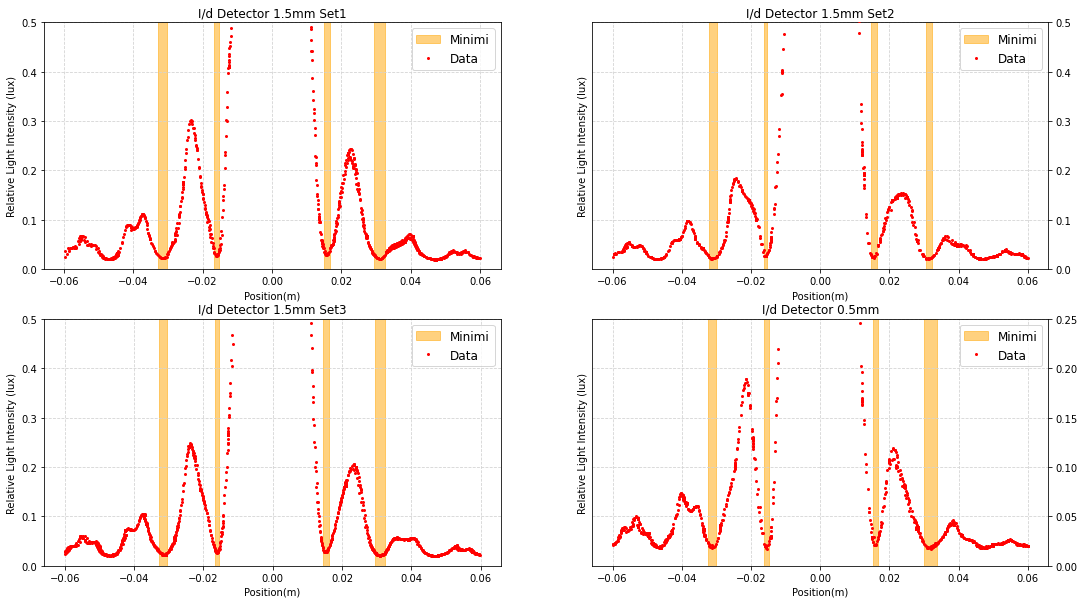

In [6]:
b = 0.04e-03

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


Table = np.loadtxt("./Antonio_0.04_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table = Table.transpose()

Table2 = np.loadtxt("./Alessio_0.04_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table2 = Table2.transpose()

Table3 = np.loadtxt("./Alessandra_0.04_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table3 = Table3.transpose()

Table4 = np.loadtxt("./Alessio_0.04_1.0_lampada.txt", delimiter="\t", skiprows=1, unpack = False)
Table4 = Table4.transpose()

Idata = Table[0]-0.013578
xdata = Table[1]*1.01

Idata2 = Table2[0]-0.013578
xdata2 = Table2[1]*1.01

Idata3 = Table3[0]-0.013578
xdata3 = Table3[1]*1.01

Idata4 = Table4[0]-0.013578
xdata4 = Table4[1]*1.01

maxint = np.argmax(Idata)
xdata = (xdata-xdata[maxint]+0.0004)

maxint = np.argmax(Idata2)
xdata2 = (xdata2-xdata2[maxint]-0.0002)

maxint = np.argmax(Idata3)
xdata3 = (xdata3-xdata3[maxint]+0.0005)

maxint = np.argmax(Idata4)
xdata4 = (xdata4-xdata4[maxint]-0.001)

#taglio a dx e sx 

xdata1 = []
Idata1 = []
for i in range(len(xdata)):
  if(np.abs(xdata[i])<0.06):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])

Idata = Idata1
xdata = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata2)):
  if(np.abs(xdata2[i])<0.06):
    xdata1.append(xdata2[i])
    Idata1.append(Idata2[i])

Idata2 = Idata1
xdata2 = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata3)):
  if(np.abs(xdata3[i])<0.06):
    xdata1.append(xdata3[i])
    Idata1.append(Idata3[i])

Idata3 = Idata1
xdata3 = xdata1

xdata1 = []
Idata1 = []
for i in range(len(xdata4)):
  if(np.abs(xdata4[i])<0.06):
    xdata1.append(xdata4[i])
    Idata1.append(Idata4[i])

Idata4 = Idata1
xdata4 = xdata1

MaxIntensity = np.max(Idata)
print('maxIntens')
print(MaxIntensity)

MaxIntensity2 = np.max(Idata2)
print('maxIntens2')
print(MaxIntensity2)

MaxIntensity3 = np.max(Idata3)
print('maxIntens3')
print(MaxIntensity3)

MaxIntensity4 = np.max(Idata4)
print('maxIntens4')
print(MaxIntensity4)

xdataerr = np.ones(len(xdata))*8e-6
Idataerr = np.ones(len(xdata))*(4.59/100*3)

xdataerr2 = np.ones(len(xdata2))*8e-6
Idataerr2 = np.ones(len(xdata2))*(4.59/100*3)

xdataerr3 = np.ones(len(xdata3))*8e-6
Idataerr3 = np.ones(len(xdata3))*(4.59/100*3)

xdataerr4 = np.ones(len(xdata4))*8e-6
Idataerr4 = np.ones(len(xdata4))*(4.59/100*3)


def distanceFunctionFit(x,b):
  return (4.23*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit2(x,b):
  return (4.4*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit3(x,b):
  return (4.38*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit4(x,b):
  return (2.11*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

#simulation

#tolgo gli zeri

xdata1 = []
Idata1 = []
Idataerr1 = []
xdataerr1 = []
for i in range(len(Idata)):
  if(xdata[i] != 0):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])
    Idataerr1.append(Idataerr[i])
    xdataerr1.append(xdataerr[i])

xdata12 = []
Idata12 = []
Idataerr12 = []
xdataerr12 = []
for i in range(len(Idata2)):
  if(xdata2[i] != 0):
    xdata12.append(xdata2[i])
    Idata12.append(Idata2[i])
    Idataerr12.append(Idataerr2[i])
    xdataerr12.append(xdataerr2[i])

xdata13 = []
Idata13 = []
Idataerr13 = []
xdataerr13 = []
for i in range(len(xdata3)):
  if(xdata3[i] != 0):
    xdata13.append(xdata3[i])
    Idata13.append(Idata3[i])
    Idataerr13.append(Idataerr3[i])
    xdataerr13.append(xdataerr3[i])

xdata14 = []
Idata14 = []
Idataerr14 = []
xdataerr14 = []
for i in range(len(xdata4)):
  if(xdata4[i] != 0):
    xdata14.append(xdata4[i])
    Idata14.append(Idata4[i])
    Idataerr14.append(Idataerr4[i])
    xdataerr14.append(xdataerr4[i])







#fitting distance from measured intensity
print("b")
print(b)
#set1
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata1, Idata1,sigma = Idataerr1,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit = popt
print("bfit")
print(bfit)
print(bfiterr)
print(0.4*10**(-5))
print('intensityfit')
print(0.16)
xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfitb,bfit)
x = np.linspace(min(xdata),max(xdata),1000)
y = distanceFunctionFit(x,bfit)
#set2
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit2, xdata12, Idata12,sigma = Idataerr12,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit2 = popt
print("bfit2")

print(bfit2)
print(bfiterr)
print(0.5*10**(-5))
print('intensityfit2')
print(0.14)
xfitb2 = np.linspace(min(xdata), max(xdata), 1000)
yfitb2 = distanceFunctionFit2(xfitb2,bfit2)
x2 = np.linspace(min(xdata2),max(xdata2),1000)
y2 = distanceFunctionFit2(x2,bfit2)

#set3
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit3, xdata13, Idata13,sigma = Idataerr13,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit3 = popt
print("bfit3")

print(bfit3)
print(bfiterr)
print(0.5*10**(-5))
print('intensityfit3')
print(0.15)
xfitb3 = np.linspace(min(xdata3), max(xdata3), 1000)
yfitb3 = distanceFunctionFit3(xfitb3,bfit3)
x3 = np.linspace(min(xdata3),max(xdata3),1000)
y3 = distanceFunctionFit3(x3,bfit3)



#set4
guess = np.array([b])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit4, xdata14, Idata14,sigma = Idataerr14,p0 = guess)

bfiterr = np.sqrt(np.diag(pcov))
bfit4 = popt
print("bfit4")

print(bfit4)
print(bfiterr)
print(0.5*10**(-5))
print('intensityfit4')
print(0.13)
xfitb4 = np.linspace(min(xdata4), max(xdata4), 1000)
yfitb4 = distanceFunctionFit4(xfitb4,bfit4)
x4 = np.linspace(min(xdata4),max(xdata4),1000)
y4 = distanceFunctionFit4(x4,bfit4)

print('bestbtot1234')
print(4.3*10**(-5))
print(0.4*10**(-5))
print('bestbtot123')
print(4.2*10**(-5))
print(0.3*10**(-5))
print('Intensitybest123')
print(4.23)
print(0.09)

xtot = np.linspace(min(xdata4),max(xdata4),1000)
ytot = distanceFunctionFit4(x4,4.2*10**(-5))


#graph
numminimi = 2
#minimumdata = findMin(3,xdata1,Idata1,bfit)
minimumdata = findMinWithRange(numminimi,xdata1,Idata1,0.00004,np.array([1.4,1.4,1.3,1.3]))

#minimumdata2 = findMin(3,xdata12,Idata12,bfit2)
minimumdata2 = findMinWithRange(numminimi,xdata12,Idata12,0.00004,np.array([1.3,1.15,1.3,1.3]))
#minimumdata3 = findMin(3,xdata13,Idata13,bfit3)
minimumdata3 = findMinWithRange(numminimi,xdata13,Idata13,0.00004,np.array([1.4,1.3,1.3,1.3]))
#minimumdata4 = findMin(3,xdata14,Idata14,bfit4)
minimumdata4 = findMinWithRange(numminimi,xdata14,Idata14,0.00004,np.array([1.3,1.3,1.3,1.3]))
#maximumdata = findMax(2,xdata1,Idata1,bfit)
#maximumdata2 = findMax(2,xdata12,Idata12,bfit2)
#maximumdata3 = findMax(2,xdata13,Idata13,bfit3)
#maximumdata4 = findMax(2,xdata14,Idata14,bfit4)

fig, axs = plt.subplots(2, 2,figsize=(18,10))
axs[0, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 0].set_ylim([0, 0.5])
#axs[0, 0].plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 0].plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 0].errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[0, 0].set_title('I/d Detector 1.5mm Set1')
axs[0, 0].axvspan(xdata1[minimumdata[0]],xdata1[minimumdata[0+numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[0, 0].axvspan(xdata1[minimumdata[1]],xdata1[minimumdata[1+numminimi*2]], alpha=0.5, color='orange')
axs[0, 0].axvspan(xdata1[minimumdata[2]],xdata1[minimumdata[2+numminimi*2]], alpha=0.5, color='orange')
axs[0, 0].axvspan(xdata1[minimumdata[3]],xdata1[minimumdata[3+numminimi*2]], alpha=0.5, color='orange')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[4]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[5]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[2]],yint, color='red', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[3]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].legend(loc="upper right",prop={'size': 12})
bintervals = []
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata1[minimumdata[i]])+np.abs(xdata1[minimumdata[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata1[minimumdata[i]]-xdata1[minimumdata[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])

for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 1')
print(b)
print(berr)
print(np.average(b,weights = berr))

b1 = np.average(b,weights = berr)
b1err = np.mean(berr)

axs[0, 1].grid(color='lightgray',linestyle="--",zorder=0)
#axs[0, 1].plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 1].plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 1].errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[0, 1].set_title('I/d Detector 1.5mm Set2')
axs[0, 1].legend(loc="upper right",prop={'size': 7.5})
axs[0, 1].set_ylim([0, 0.5])
axs[0, 1].axvspan(xdata12[minimumdata2[0]],xdata12[minimumdata2[0+numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[0, 1].axvspan(xdata12[minimumdata2[1]],xdata12[minimumdata2[1+numminimi*2]], alpha=0.5, color='orange')
axs[0, 1].axvspan(xdata12[minimumdata2[2]],xdata12[minimumdata2[2+numminimi*2]], alpha=0.5, color='orange')
axs[0, 1].axvspan(xdata12[minimumdata2[3]],xdata12[minimumdata2[3+numminimi*2]], alpha=0.5, color='orange')
axs[0, 1].legend(loc="upper right",prop={'size': 12})
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata12[minimumdata2[i]])+np.abs(xdata12[minimumdata2[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata12[minimumdata2[i]]-xdata12[minimumdata2[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 2')
print(b)
print(berr)
print(np.average(b,weights = berr))
b2 = np.average(b,weights = berr)
b2err = np.mean(berr)

axs[1, 0].grid(color='lightgray',linestyle="--",zorder=0)
#axs[1, 0].plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 0].plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 0].errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[1, 0].set_title('I/d Detector 1.5mm Set3')
axs[1, 0].legend(loc="upper right",prop={'size': 7.5})
axs[1, 0].set_ylim([0, 0.5])
axs[1, 0].axvspan(xdata13[minimumdata3[0]],xdata13[minimumdata3[0+numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[1, 0].axvspan(xdata13[minimumdata3[1]],xdata13[minimumdata3[1+numminimi*2]], alpha=0.5, color='orange')
axs[1, 0].axvspan(xdata13[minimumdata3[2]],xdata13[minimumdata3[2+numminimi*2]], alpha=0.5, color='orange')
axs[1, 0].axvspan(xdata13[minimumdata3[3]],xdata13[minimumdata3[3+numminimi*2]], alpha=0.5, color='orange')
axs[1, 0].legend(loc="upper right",prop={'size': 12})
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata13[minimumdata3[i]])+np.abs(xdata13[minimumdata3[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata13[minimumdata3[i]]-xdata13[minimumdata3[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 3')
print(b)
print(berr)
print(np.average(b,weights = berr))
b3 = np.average(b,weights = berr)
b3err = np.mean(berr)

axs[1, 1].grid(color='lightgray',linestyle="--",zorder=0)
#axs[1, 1].plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 1].plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 1].errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[1, 1].set_title('I/d Detector 0.5mm')
axs[1, 1].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].yaxis.tick_right()
axs[1, 1].set_ylim([0, 0.25])
axs[1, 1].axvspan(xdata14[minimumdata4[0]],xdata14[minimumdata4[numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[1, 1].axvspan(xdata14[minimumdata4[1]],xdata14[minimumdata4[1+numminimi*2]], alpha=0.5, color='orange')
axs[1, 1].axvspan(xdata14[minimumdata4[2]],xdata14[minimumdata4[2+numminimi*2]], alpha=0.5, color='orange')
axs[1, 1].axvspan(xdata14[minimumdata4[3]],xdata14[minimumdata4[3+numminimi*2]], alpha=0.5, color='orange')
axs[1, 1].legend(loc="upper right",prop={'size': 12})
b = []
berr = []

for i in range(numminimi*2):
  mindiff = (np.abs(xdata14[minimumdata4[i]])+np.abs(xdata14[minimumdata4[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata14[minimumdata4[i]]-xdata14[minimumdata4[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 4')
print(b)
print(berr)
print(np.average(b,weights = berr))
b4 = np.average(b,weights = berr)
b4err = np.mean(berr)




intervals = ob.solve(bintervals)
print('b finale per 0.04')
print((intervals[0]+intervals[1])/2)
print(np.abs(intervals[0]-intervals[1])/2)

for ax in axs.flat:
    ax.set(xlabel='Position(m)', ylabel='Relative Light Intensity (lux)')

axs[0, 1].yaxis.tick_right()
axs[0, 1].set(ylabel='Relative Light Intensity (lux)')
plt.show()
fig.savefig(f'4Grafici_0.04.pdf',dpi = 300)








xdata0041 = xdata1
Idata0041 = Idata1

xdata0042 = xdata12
Idata0042 = Idata12

xdata0043 = xdata13
Idata0043 = Idata13

xdata0044 = xdata14
Idata0044 = Idata14

maxIntens
1.1126116
maxIntens2
1.3171862
maxIntens3
1.2268694
maxIntens4
0.64246952
b
2e-05
bfit
1.8408679736829005e-05
6.171026718652927e-08
bfit2
2.0387958920737872e-05
7.419410298966012e-08
bfit3
2.0893463351878904e-05
6.893266507123338e-08
2.0000000000000003e-06
bfit4
2.0015559421658347e-05
8.839013553366836e-08
b best da media e std
1.992641535777603e-05
9.300097261086587e-07
Intensity best da media e std
1.0650185947892006
0.0440031086036774
b set 1
[2.0200480587797256e-05, 2.0228947741158837e-05, 2.0372479266997502e-05, 2.0273382818224414e-05]
[6.951253254003748e-07, 4.5337207592361256e-07, 5.464788616429222e-07, 4.2358723615560993e-07]
2.026551536687369e-05
b set 2
[2.0093667811268286e-05, 2.0087418196447645e-05, 2.0137514691056285e-05, 2.0369269904282566e-05]
[4.816774674232654e-07, 7.747806125493286e-07, 5.653213655718622e-07, 7.292544078248852e-07]
2.0180271733989073e-05
b set 3
[2.0244792161709775e-05, 2.0043788966480697e-05, 2.0099921316070254e-05, 2.041110171240936e-05]
[

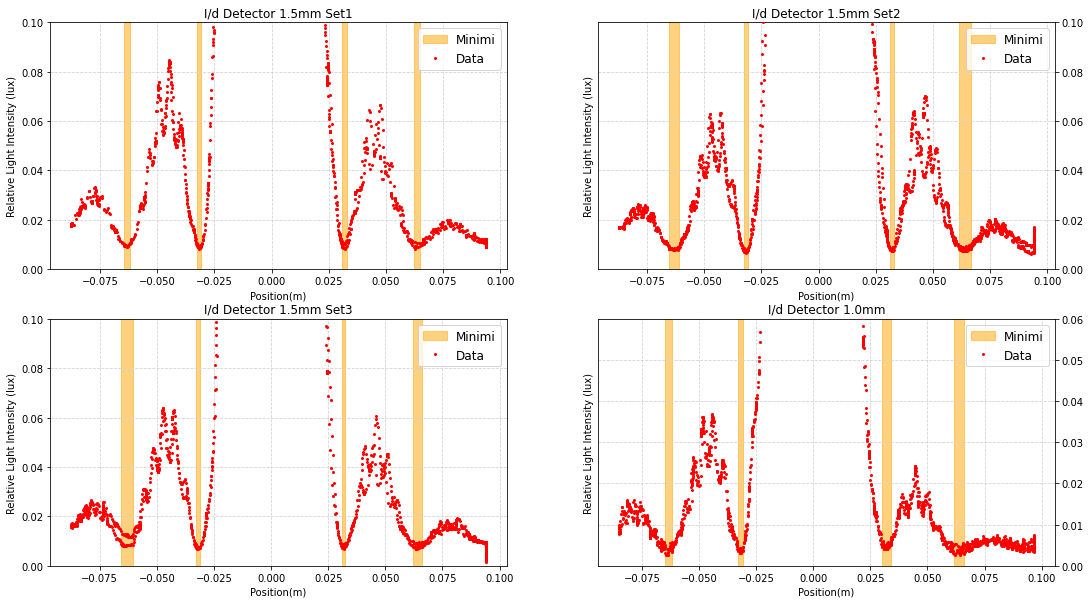

In [7]:
b = 0.02e-03

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


Table = np.loadtxt("./Antonio_0.02_1.5_lampadina_2.txt", delimiter="\t", skiprows=1, unpack = False)
Table = Table.transpose()

Table2 = np.loadtxt("./Alessio_0.02_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table2 = Table2.transpose()

Table3 = np.loadtxt("./Alessandra_0.02_1.5_lampadina.txt", delimiter="\t", skiprows=1, unpack = False)
Table3 = Table3.transpose()

Table4 = np.loadtxt("./Alessio_0.02_1.0_candela.txt", delimiter="\t", skiprows=1, unpack = False)
Table4 = Table4.transpose()

Idata = Table[0]-0.013578-0.015
xdata = Table[1]*1.01

Idata2 = Table2[0]-0.013578-0.015
xdata2 = Table2[1]*1.01

Idata3 = Table3[0]-0.013578-0.015
xdata3 = Table3[1]*1.01

Idata4 = Table4[0]-0.013578/100-0.6/100
xdata4 = Table4[1]*1.01

maxint = np.argmax(Idata)
xdata = (xdata-xdata[maxint])

maxint = np.argmax(Idata2)
xdata2 = (xdata2-xdata2[maxint])

maxint = np.argmax(Idata3)
xdata3 = (xdata3-xdata3[maxint])

maxint = np.argmax(Idata4)
xdata4 = (xdata4-xdata4[maxint]-0.005)


MaxIntensity = np.max(Idata)
print('maxIntens')
print(MaxIntensity)

MaxIntensity2 = np.max(Idata2)
print('maxIntens2')
print(MaxIntensity2)

MaxIntensity3 = np.max(Idata3)
print('maxIntens3')
print(MaxIntensity3)

MaxIntensity4 = np.max(Idata4)
print('maxIntens4')
print(MaxIntensity4)

xdataerr = np.ones(len(xdata))*8e-6
Idataerr = np.ones(len(xdata))*(4.59/100*3)

xdataerr2 = np.ones(len(xdata2))*8e-6
Idataerr2 = np.ones(len(xdata2))*(4.59/100*3)

xdataerr3 = np.ones(len(xdata3))*8e-6
Idataerr3 = np.ones(len(xdata3))*(4.59/100*3)

xdataerr4 = np.ones(len(xdata4))*8e-6
Idataerr4 = np.ones(len(xdata4))*(4.59*3)


def distanceFunctionFit(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit2(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit3(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)
def distanceFunctionFit4(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

#simulation

#tolgo gli zeri

xdata1 = []
Idata1 = []
Idataerr1 = []
xdataerr1 = []
for i in range(len(Idata)):
  if(xdata[i] != 0):
    xdata1.append(xdata[i])
    Idata1.append(Idata[i])
    Idataerr1.append(Idataerr[i])
    xdataerr1.append(xdataerr[i])

xdata12 = []
Idata12 = []
Idataerr12 = []
xdataerr12 = []
for i in range(len(Idata2)):
  if(xdata2[i] != 0):
    xdata12.append(xdata2[i])
    Idata12.append(Idata2[i])
    Idataerr12.append(Idataerr2[i])
    xdataerr12.append(xdataerr2[i])

xdata13 = []
Idata13 = []
Idataerr13 = []
xdataerr13 = []
for i in range(len(xdata3)):
  if(xdata3[i] != 0):
    xdata13.append(xdata3[i])
    Idata13.append(Idata3[i])
    Idataerr13.append(Idataerr3[i])
    xdataerr13.append(xdataerr3[i])

xdata14 = []
Idata14 = []
Idataerr14 = []
xdataerr14 = []
for i in range(len(xdata4)):
  if(xdata4[i] != 0):
    xdata14.append(xdata4[i])
    Idata14.append(Idata4[i])
    Idataerr14.append(Idataerr4[i])
    xdataerr14.append(xdataerr4[i])



#fitting distance from measured intensity
print("b")
print(b)
#set1
guess = np.array([b,MaxIntensity])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit, xdata1, Idata1,sigma = Idataerr1,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit,intensity = popt
intensity1 = intensity
print("bfit")
print(bfit)
print(bfiterr)

xfitb = np.linspace(min(xdata), max(xdata), 1000)
yfitb = distanceFunctionFit(xfitb,bfit,intensity)
x = np.linspace(min(xdata),max(xdata),1000)
y = distanceFunctionFit(x,bfit,intensity)
#set2
guess = np.array([b,MaxIntensity2])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit2, xdata12, Idata12,sigma = Idataerr12,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit2,intensity = popt
print("bfit2")
intensity2 = intensity
print(bfit2)
print(bfiterr)
xfitb2 = np.linspace(min(xdata), max(xdata), 1000)
yfitb2 = distanceFunctionFit2(xfitb2,bfit2,intensity)
x2 = np.linspace(min(xdata2),max(xdata2),1000)
y2 = distanceFunctionFit2(x2,bfit2,intensity)

#set3
guess = np.array([b,MaxIntensity3])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit3, xdata13, Idata13,sigma = Idataerr13,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit3,intensity = popt
print("bfit3")
intensity3 = intensity
print(bfit3)
print(bfiterr)
print(0.2*10**(-5))
xfitb3 = np.linspace(min(xdata3), max(xdata3), 1000)
yfitb3 = distanceFunctionFit3(xfitb3,bfit3,intensity)
x3 = np.linspace(min(xdata3),max(xdata3),1000)
y3 = distanceFunctionFit3(x3,bfit3,intensity)


#set4
guess = np.array([b,MaxIntensity4])
popt, pcov = scipy.optimize.curve_fit(distanceFunctionFit4, xdata14, Idata14,sigma = Idataerr14,p0 = guess)

bfiterr,intensityerr = np.sqrt(np.diag(pcov))
bfit4,intensity = popt
print("bfit4")
intensity4 = intensity
print(bfit4)
print(bfiterr)
xfitb4 = np.linspace(min(xdata4), max(xdata4), 1000)
yfitb4 = distanceFunctionFit4(xfitb4,bfit4,intensity)
x4 = np.linspace(min(xdata4),max(xdata4),1000)
y4 = distanceFunctionFit4(x4,bfit4,intensity)

print('b best da media e std')
print(np.mean(np.array([bfit,bfit2,bfit3,bfit4])))
print(np.std(np.array([bfit,bfit2,bfit3,bfit4])))
print('Intensity best da media e std')
print(np.mean(np.array([intensity1,intensity2,intensity3])))
print(np.std(np.array([intensity1,intensity2,intensity3])))

#graph
numminimi = 2
#minimumdata = findMin(3,xdata1,Idata1,bfit)
minimumdata = findMinWithRange(numminimi,xdata1,Idata1,0.00002,np.array([1.15,1.15,1.15,1.15]))

#minimumdata2 = findMin(3,xdata12,Idata12,bfit2)
minimumdata2 = findMinWithRange(numminimi,xdata12,Idata12,0.00002,np.array([1.15,1.15,1.15,1.15]))
#minimumdata3 = findMin(3,xdata13,Idata13,bfit3)
minimumdata3 = findMinWithRange(numminimi,xdata13,Idata13,0.00002,np.array([1.15,1.15,1.15,1.15]))
#minimumdata4 = findMin(3,xdata14,Idata14,bfit4)
minimumdata4 = findMinWithRange(numminimi,xdata14,Idata14,0.00002,np.array([1.3,1.15,1.3,1.3]))
#maximumdata = findMax(2,xdata1,Idata1,bfit)
#maximumdata2 = findMax(2,xdata12,Idata12,bfit2)
#maximumdata3 = findMax(2,xdata13,Idata13,bfit3)
#maximumdata4 = findMax(2,xdata14,Idata14,bfit4)

fig, axs = plt.subplots(2, 2,figsize=(18,10))
axs[0, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 0].set_ylim([0, 0.1])
#axs[0, 0].plot(xfitb, yfitb, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 0].plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 0].errorbar(xdata1,Idata1,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[0, 0].set_title('I/d Detector 1.5mm Set1')
axs[0, 0].axvspan(xdata1[minimumdata[0]],xdata1[minimumdata[0+numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[0, 0].axvspan(xdata1[minimumdata[1]],xdata1[minimumdata[1+numminimi*2]], alpha=0.5, color='orange')
axs[0, 0].axvspan(xdata1[minimumdata[2]],xdata1[minimumdata[2+numminimi*2]], alpha=0.5, color='orange')
axs[0, 0].axvspan(xdata1[minimumdata[3]],xdata1[minimumdata[3+numminimi*2]], alpha=0.5, color='orange')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[0]],yint, color='blue', linewidth=0.75, linestyle='dashed', label='Minimi')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[1]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[2]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[3]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[4]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[minimumdata[5]],yint, color='blue', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[0]],yint, color='red', linewidth=0.75, linestyle='dashed', label='Massimi')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[1]],yint, color='red', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[2]],yint, color='red', linewidth=0.75, linestyle='dashed')
#axs[0, 0].plot(np.ones(len(yint))*xdata1[maximumdata[3]],yint, color='red', linewidth=0.75, linestyle='dashed')
axs[0, 0].legend(loc="upper right",prop={'size': 12})
bintervals = []
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata1[minimumdata[i]])+np.abs(xdata1[minimumdata[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata1[minimumdata[i]]-xdata1[minimumdata[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])

for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 1')
print(b)
print(berr)
print(np.average(b,weights = berr))

b1 = np.average(b,weights = berr)
b1err = np.mean(berr)

axs[0, 1].grid(color='lightgray',linestyle="--",zorder=0)
#axs[0, 1].plot(xfitb2, yfitb2, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[0, 1].plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 1].errorbar(xdata12,Idata12,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[0, 1].set_title('I/d Detector 1.5mm Set2')
axs[0, 1].legend(loc="upper right",prop={'size': 7.5})
axs[0, 1].set_ylim([0, 0.1])
axs[0, 1].axvspan(xdata12[minimumdata2[0]],xdata12[minimumdata2[0+numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[0, 1].axvspan(xdata12[minimumdata2[1]],xdata12[minimumdata2[1+numminimi*2]], alpha=0.5, color='orange')
axs[0, 1].axvspan(xdata12[minimumdata2[2]],xdata12[minimumdata2[2+numminimi*2]], alpha=0.5, color='orange')
axs[0, 1].axvspan(xdata12[minimumdata2[3]],xdata12[minimumdata2[3+numminimi*2]], alpha=0.5, color='orange')
axs[0, 1].legend(loc="upper right",prop={'size': 12})
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata12[minimumdata2[i]])+np.abs(xdata12[minimumdata2[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata12[minimumdata2[i]]-xdata12[minimumdata2[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 2')
print(b)
print(berr)
print(np.average(b,weights = berr))
b2 = np.average(b,weights = berr)
b2err = np.mean(berr)

axs[1, 0].grid(color='lightgray',linestyle="--",zorder=0)
#axs[1, 0].plot(xfitb3, yfitb3, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 0].plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 0].errorbar(xdata13,Idata13,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[1, 0].set_title('I/d Detector 1.5mm Set3')
axs[1, 0].legend(loc="upper right",prop={'size': 7.5})
axs[1, 0].set_ylim([0, 0.1])
axs[1, 0].axvspan(xdata13[minimumdata3[0]],xdata13[minimumdata3[0+numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[1, 0].axvspan(xdata13[minimumdata3[1]],xdata13[minimumdata3[1+numminimi*2]], alpha=0.5, color='orange')
axs[1, 0].axvspan(xdata13[minimumdata3[2]],xdata13[minimumdata3[2+numminimi*2]], alpha=0.5, color='orange')
axs[1, 0].axvspan(xdata13[minimumdata3[3]],xdata13[minimumdata3[3+numminimi*2]], alpha=0.5, color='orange')
axs[1, 0].legend(loc="upper right",prop={'size': 12})
b = []
berr = []
for i in range(numminimi*2):
  mindiff = (np.abs(xdata13[minimumdata3[i]])+np.abs(xdata13[minimumdata3[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata13[minimumdata3[i]]-xdata13[minimumdata3[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 3')
print(b)
print(berr)
print(np.average(b,weights = berr))
b3 = np.average(b,weights = berr)
b3err = np.mean(berr)

axs[1, 1].grid(color='lightgray',linestyle="--",zorder=0)
#axs[1, 1].plot(xfitb4, yfitb4, linewidth=1, zorder=3, color="blue", label='Fit')
#axs[1, 1].plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 1].errorbar(xdata14,Idata14,label="Data", color = "red", fmt='o', markersize=2, zorder=4)
axs[1, 1].set_title('I/d Detector 1.0mm')
axs[1, 1].legend(loc="upper right",prop={'size': 7.5})
axs[1, 1].yaxis.tick_right()
axs[1, 1].set_ylim([0, 6/100])
axs[1, 1].axvspan(xdata14[minimumdata4[0]],xdata14[minimumdata4[numminimi*2]], alpha=0.5, color='orange', label='Minimi')
axs[1, 1].axvspan(xdata14[minimumdata4[1]],xdata14[minimumdata4[1+numminimi*2]], alpha=0.5, color='orange')
axs[1, 1].axvspan(xdata14[minimumdata4[2]],xdata14[minimumdata4[2+numminimi*2]], alpha=0.5, color='orange')
axs[1, 1].axvspan(xdata14[minimumdata4[3]],xdata14[minimumdata4[3+numminimi*2]], alpha=0.5, color='orange')
axs[1, 1].legend(loc="upper right",prop={'size': 12})
b = []
berr = []

for i in range(numminimi*2):
  mindiff = (np.abs(xdata14[minimumdata4[i]])+np.abs(xdata14[minimumdata4[i+numminimi*2]]))/2
  mindifferr = np.abs(xdata14[minimumdata4[i]]-xdata14[minimumdata4[i+numminimi*2]])/2
  if(i<numminimi):
    b.append(L/mindiff*lung_onda*(i+1))
  else:
    b.append(L/mindiff*lung_onda*(i-numminimi+1))
  berr.append(((0.001/L)**2+(mindifferr/mindiff)**2)**(1/2)*b[i])
for i in range (len(b)):
  bintervals.append([b[i]-berr[i],b[i]+berr[i]])
print('b set 4')
print(b)
print(berr)
print(np.average(b,weights = berr))
b4 = np.average(b,weights = berr)
b4err = np.mean(berr)




intervals = ob.solve(bintervals)
print('b finale per 0.02')
print((intervals[0]+intervals[1])/2)
print(np.abs(intervals[0]-intervals[1])/2)

for ax in axs.flat:
    ax.set(xlabel='Position(m)', ylabel='Relative Light Intensity (lux)')

axs[0, 1].yaxis.tick_right()
axs[0, 1].set(ylabel='Relative Light Intensity (lux)')
plt.show()
fig.savefig(f'4Grafici_0.02.pdf',dpi = 300)







xdata0021 = xdata1
Idata0021 = Idata1

xdata0022 = xdata12
Idata0022 = Idata12

xdata0023 = xdata13
Idata0023 = Idata13

xdata0024 = xdata14
Idata0024 = Idata14

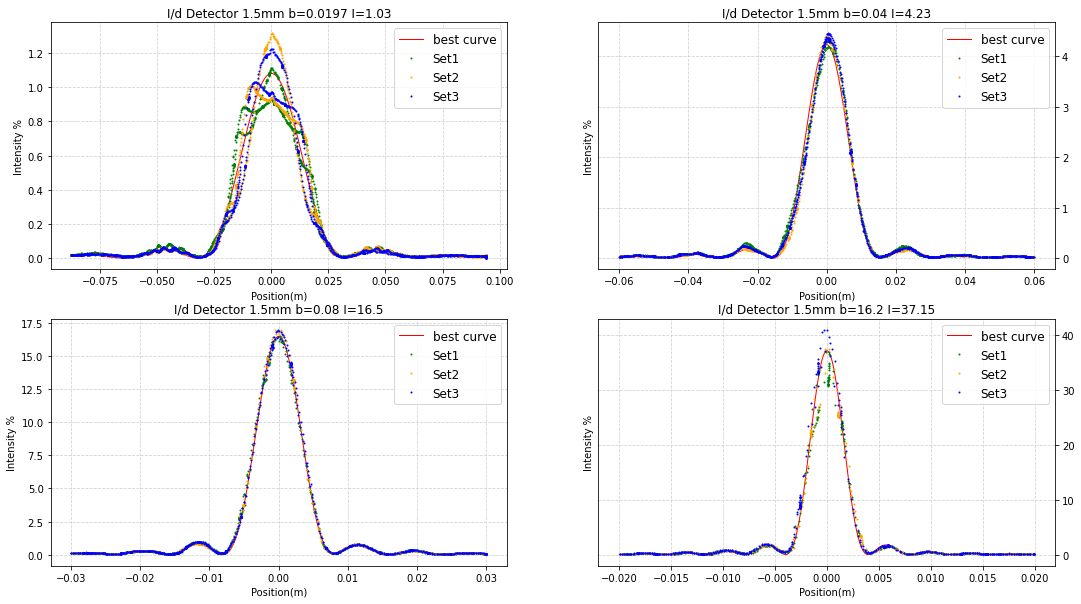

In [25]:
def distanceFunctionFit(x,b,intensity):
  return (intensity*((np.sin(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))/(np.pi*b/lung_onda*np.sin(np.arctan(x/L))))**2)

x1 = np.linspace(np.min(xdata0021),np.max(xdata0021),1000)
y1 = distanceFunctionFit(x1,1.97*10**(-5),1.08)
x2 = np.linspace(np.min(xdata0041),np.max(xdata0041),1000)
y2 = distanceFunctionFit(x2,4.2*10**(-5),4.23)
x3 = np.linspace(np.min(xdata0081),np.max(xdata0081),1000)
y3 = distanceFunctionFit(x3,8*10**(-5),16.5)
x4 = np.linspace(np.min(xdata0161),np.max(xdata0161),1000)
y4 = distanceFunctionFit(x4,16.2*10**(-5),37.15)

fig, axs = plt.subplots(2, 2,figsize=(18,10))
axs[0, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 0].plot(x1, y1, linewidth=1, zorder=3, color="red", label='best curve')
#axs[0, 0].plot(x,y, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 0].errorbar(xdata0021,Idata0021,label="Set1", color = "green", fmt='o', markersize=1, zorder=4)
axs[0, 0].errorbar(xdata0022,Idata0022,label="Set2", color = "orange", fmt='o', markersize=1, zorder=4)
axs[0, 0].errorbar(xdata0023,Idata0023,label="Set3", color = "blue", fmt='o', markersize=1, zorder=4)
axs[0, 0].set_title('I/d Detector 1.5mm b=0.0197 I=1.03')
axs[0, 0].legend(loc="upper right",prop={'size': 12})

axs[0, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[0, 1].plot(x2, y2, linewidth=1, zorder=3, color="red", label='best curve')
#axs[0, 1].plot(x2,y2, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[0, 1].errorbar(xdata0041,Idata0041,label="Set1", color = "green", fmt='o', markersize=1, zorder=4)
axs[0, 1].errorbar(xdata0042,Idata0042,label="Set2", color = "orange", fmt='o', markersize=1, zorder=4)
axs[0, 1].errorbar(xdata0043,Idata0043,label="Set3", color = "blue", fmt='o', markersize=1, zorder=4)
axs[0, 1].set_title('I/d Detector 1.5mm b=0.04 I=4.23')
axs[0, 1].legend(loc="upper right",prop={'size': 12})


axs[1, 0].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 0].plot(x3, y3, linewidth=1, zorder=3, color="red", label='best curve')
#axs[1, 0].plot(x3,y3, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 0].errorbar(xdata0081,Idata0081,label="Set1", color = "green", fmt='o', markersize=1, zorder=4)
axs[1, 0].errorbar(xdata0082,Idata0082,label="Set2", color = "orange", fmt='o', markersize=1, zorder=4)
axs[1, 0].errorbar(xdata0083,Idata0083,label="Set3", color = "blue", fmt='o', markersize=1, zorder=4)
axs[1, 0].set_title('I/d Detector 1.5mm b=0.08 I=16.5')
axs[1, 0].legend(loc="upper right",prop={'size': 12})


axs[1, 1].grid(color='lightgray',linestyle="--",zorder=0)
axs[1, 1].plot(x4, y4, linewidth=1, zorder=3, color="red", label='best curve')
#axs[1, 1].plot(x4,y4, label="Simulation", color="orange", linewidth=3, zorder=1)
axs[1, 1].errorbar(xdata0161,Idata0161,label="Set1", color = "green", fmt='o', markersize=1, zorder=4)
axs[1, 1].errorbar(xdata0162,Idata0162,label="Set2", color = "orange", fmt='o', markersize=1, zorder=4)
axs[1, 1].errorbar(xdata0163,Idata0163,label="Set3", color = "blue", fmt='o', markersize=1, zorder=4)
axs[1, 1].set_title('I/d Detector 1.5mm b=16.2 I=37.15')
axs[1, 1].legend(loc="upper right",prop={'size': 12})
axs[1, 1].yaxis.tick_right()


for ax in axs.flat:
    ax.set(xlabel='Position(m)', ylabel='Intensity %')

axs[0, 1].yaxis.tick_right()
axs[0, 1].set(ylabel='Intensity %')
plt.show()
fig.savefig(f'4Grafici_finali.pdf',dpi = 300)